<div style="border:solid green 2px; padding: 20px">
<b>Анна, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

##### Задача: сделать предварительный анализ тарифов на небольшой выборке клиентов. 
Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

_Переформулируем: т.е. какой тариф приносит оператору Мегалайн больше денег._

*Тариф «Смарт»*
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей. 

-----
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. 
Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 
Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

# 1. Общая информация файлов и их первичная обработка

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats as st

import datetime 
from datetime import datetime, date

pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 30) 
pd.set_option('display.width', 80) 
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
#%matplotlib inline

Импортируем данные, просмотрим информацию о датасетах, проверим пропуски, значимые колонки, изменим формат данных, если нужно и переименуем столбцы для более удобного использования их в дальнейшем. 

#### Звонки - датасет calls

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Поправь пожалуйста ошибку в коде, чтобы я смог проверить проект дальше.
    
Рекомендую перед отправкой проекта запустить весь проект целиком, чтобы не возникло дополнительных ошибок.
    
---
    
Можно попробовать использовать связку `try – except`, где мы укажем пути на сервере и на локальной машине соответственно.
    
Почему это важно? 
    
В любом проекте, в котором будешь участвовать за частую приходится работать с серверами и пути играют очень большую роль в настройке проект конечно.
    
---
    
P.s. Пострараюсь быстрее проверить твой проект, когда вернешь его обратно.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Я делала проект на локальной машине впервые, и не предполагала, что пути будут различаться. Я поместила на своей локальной машине датасеты в ту же папку, чтобы адрес совпадал с адресом в описаниях датасетов, указанных в тренажере. У меня всё работает по-прежнему. Надеюсь, и у тебя теперь сработает также. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Супер, теперь все отлично.
    
</div>

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Тип данных корректен кроме даты, которая требует преобразования. Требуется извлечение номера месяца в отдельный столбец для дальнейшей работы с этими данными. 

In [6]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
df_calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Нулевые значения удалять не станем, это пропущенные звонки. 

In [8]:
df_calls['calls_month']=df_calls['call_date'].dt.month
df_calls.head()

,id,call_date,duration,user_id,calls_month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего использовать месяцы в формате дат, например `yyyy-mm-dd` (2020-01-01), потому что в наших данных может быть несколько временных периодов и эти периоды будут тогда помещены в одну группу, при методе выше.
    
</div>

In [9]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id             202607 non-null object
call_date      202607 non-null datetime64[ns]
duration       202607 non-null float64
user_id        202607 non-null int64
calls_month    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


#### Интернет - датасет internet

In [10]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Тип данных корректен кроме даты, которая требует преобразования. Требуется извлечение номера месяца в отдельный столбец для дальнейшей работы с этими данными. 

In [14]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
del df_internet['Unnamed: 0']
df_internet['internet_month']=df_internet['session_date'].dt.month
df_internet.head()

,id,mb_used,session_date,user_id,internet_month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [17]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id                149396 non-null object
mb_used           149396 non-null float64
session_date      149396 non-null datetime64[ns]
user_id           149396 non-null int64
internet_month    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


#### Сообщения - датасет messages

In [18]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [19]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
df_messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Тип данных корректен кроме даты, которая требует преобразования. Требуется извлечение номера месяца в отдельный столбец для дальнейшей работы с этими данными. 

In [22]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')
df_messages['messages_month']=df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,messages_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [23]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id                123036 non-null object
message_date      123036 non-null datetime64[ns]
user_id           123036 non-null int64
messages_month    123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


#### Датасет users

In [24]:
df_users = pd.read_csv('/datasets/users.csv')

In [25]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [27]:
df_users.user_id.unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

Перечень user_id от 1000 до 1499. 


Тип данных корректен кроме даты, которая требует преобразования. Требуется извлечение номера месяца регистрации и прекращения пользования тарифом в отдельный столбец, для сводных таблиц. 

In [28]:
df_users['churn_date']=pd.to_datetime(df_users['churn_date'], format='%Y.%m.%d', errors='coerce')
df_users['reg_date']=pd.to_datetime(df_users['reg_date'], format='%Y.%m.%d')
df_users['users_reg_month']=df_users['reg_date'].dt.month
df_users['churn_month']=df_users['churn_date'].dt.month
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,nan
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,nan
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,nan
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,nan


In [29]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [30]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id            500 non-null int64
age                500 non-null int64
churn_date         38 non-null datetime64[ns]
city               500 non-null object
first_name         500 non-null object
last_name          500 non-null object
reg_date           500 non-null datetime64[ns]
tariff             500 non-null object
users_reg_month    500 non-null int64
churn_month        38 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


Проверим количество пользователей тарифов

In [31]:
df_users_ultra=df_users.query('tariff == "ultra"')
df_users_smart=df_users.query('tariff == "smart"')
print (
    'пользователи ultra, чел:', len(df_users_ultra.user_id.tolist()), 
    ', пользователи smart, чел:', len(df_users_smart.user_id.tolist())
)

пользователи ultra, чел: 149 , пользователи smart, чел: 351


#### Датасет tariffs, справочный

In [32]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [33]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [34]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Переименуем в этом датасете название колонки 'tariff_name' на 'tariff', чтобы потом легче было в сводных таблицах подтягивать информацию. 

In [35]:
df_tariffs=df_tariffs.rename(columns={'tariff_name': 'tariff'})
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# 2. Предварительные расчеты

Подсчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Создадим базовый датасет с user_id и столбцами, который потом будем заполнять информацией. Для каждого пользователя - по 12 месяцев с 1 по 12-й. 

In [36]:
user_id=[]
months=[]
for i in range (1000, 1500): 
    for j in range (1, 13): 
        user_id.append(i)
        months.append(j)   
basic_df=pd.DataFrame({'user_id':user_id, 'month':months})
basic_df

,user_id,month
0,1000,1
1,1000,2
2,1000,3
3,1000,4
4,1000,5
...,...,...
5995,1499,8
5996,1499,9
5997,1499,10
5998,1499,11


Теперь нам нужно удалить из этого датасета те месяца для пользователя, когда он еще не был зарегистрирован или уже прекратил пользование тарифом. Мы могли бы это отследить по его активности в датасетах со звонками, смс и интернетом, но предположим, что существуют пользователи, которые за месяц ни разу не отправили смс, не вышли в интернет и не совершили ни одного исходящего звонка, даже такого, когда его абонент не взял трубку и его звонок тарифицировался как нулевой. Такие пользователи могут не появляться в какие-то месяцы в датасетах звонков, смс и интернета, но в то же самое время платить свою абонентскую плату. 

In [37]:
reg_churn_users=df_users[['user_id', 'users_reg_month', 'churn_month']]
reg_churn_users.head()

,user_id,users_reg_month,churn_month
0,1000,5,nan
1,1001,11,nan
2,1002,6,nan
3,1003,8,nan
4,1004,5,nan


In [38]:
reg_churn_users.churn_month.isnull().value_counts()

True     462
False     38
Name: churn_month, dtype: int64

38 пользователей имеет дату прекращения регистрации, остальные - нет, что означает, очевидно, что они не прекратили пользоваться тарифом

In [39]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,nan
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,nan
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,nan
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,nan


Присоединим данные с месяцем начала регистрации и месяцем прекращения регистрации, заменим в месяце прекращения регистрации NaN на 13-й месяц (т.е. определив, что до конца исследуемого года пользователь не прекратил пользование тарифом), сделаем флаги-разницы и удалим лишние строки на основании того, что месяц, указанный в month должен быть больше или равен месяцу регистрации и меньше либо равен месяцу прекращения регистрации. 

In [40]:
merged_basic_df=basic_df.merge(reg_churn_users, how='left')
merged_basic_df.head()

,user_id,month,users_reg_month,churn_month
0,1000,1,5,nan
1,1000,2,5,nan
2,1000,3,5,nan
3,1000,4,5,nan
4,1000,5,5,nan


In [41]:
merged_basic_df.churn_month=merged_basic_df.churn_month.fillna(13)
merged_basic_df

,user_id,month,users_reg_month,churn_month
0,1000,1,5,13.00
1,1000,2,5,13.00
2,1000,3,5,13.00
3,1000,4,5,13.00
4,1000,5,5,13.00
...,...,...,...,...
5995,1499,8,9,13.00
5996,1499,9,9,13.00
5997,1499,10,9,13.00
5998,1499,11,9,13.00


In [42]:
merged_basic_df['flag1']=merged_basic_df['month']-merged_basic_df['users_reg_month']
merged_basic_df['flag2']=merged_basic_df['month']-merged_basic_df['churn_month']
merged_basic_df

,user_id,month,users_reg_month,churn_month,flag1,flag2
0,1000,1,5,13.00,-4,-12.00
1,1000,2,5,13.00,-3,-11.00
2,1000,3,5,13.00,-2,-10.00
3,1000,4,5,13.00,-1,-9.00
4,1000,5,5,13.00,0,-8.00
...,...,...,...,...,...,...
5995,1499,8,9,13.00,-1,-5.00
5996,1499,9,9,13.00,0,-4.00
5997,1499,10,9,13.00,1,-3.00
5998,1499,11,9,13.00,2,-2.00


In [43]:
merged_basic_df=merged_basic_df.loc[merged_basic_df['flag1']>=0]
merged_basic_df.head()

,user_id,month,users_reg_month,churn_month,flag1,flag2
4,1000,5,5,13.00,0,-8.00
5,1000,6,5,13.00,1,-7.00
6,1000,7,5,13.00,2,-6.00
7,1000,8,5,13.00,3,-5.00
8,1000,9,5,13.00,4,-4.00


In [44]:
merged_basic_df=merged_basic_df.loc[merged_basic_df['flag2']<=0]
merged_basic_df.head(20)

,user_id,month,users_reg_month,churn_month,flag1,flag2
4,1000,5,5,13.00,0,-8.00
5,1000,6,5,13.00,1,-7.00
6,1000,7,5,13.00,2,-6.00
7,1000,8,5,13.00,3,-5.00
8,1000,9,5,13.00,4,-4.00
9,1000,10,5,13.00,5,-3.00
10,1000,11,5,13.00,6,-2.00
11,1000,12,5,13.00,7,-1.00
22,1001,11,11,13.00,0,-2.00
23,1001,12,11,13.00,1,-1.00


In [45]:
basic_data=merged_basic_df[['user_id', 'month']]
basic_data

,user_id,month
4,1000,5
5,1000,6
6,1000,7
7,1000,8
8,1000,9
...,...,...
5985,1498,10
5996,1499,9
5997,1499,10
5998,1499,11


В итоге у нас остался датасет только с теми месяцами для пользователей, когда они на самом деле обладали тарифом,  т.е. даже при отсутствии активности должны были платить свою абонентскую плату. 

Добавим в эту информацию данные по пользователю - наименование тарифа и название города - для дальнейшего анализа. Возраст и имя нам в нашем анализе не нужны. 

In [46]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,nan
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,nan
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,nan
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,nan
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,nan


In [47]:
df_user_info=df_users[['user_id', 'city', 'tariff']]
df_user_info.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [48]:
basic_user=basic_data.merge(df_user_info, how='left')
basic_user

,user_id,month,city,tariff
0,1000,5,Краснодар,ultra
1,1000,6,Краснодар,ultra
2,1000,7,Краснодар,ultra
3,1000,8,Краснодар,ultra
4,1000,9,Краснодар,ultra
...,...,...,...,...
3211,1498,10,Владикавказ,smart
3212,1499,9,Пермь,smart
3213,1499,10,Пермь,smart
3214,1499,11,Пермь,smart


Добавим в эту таблицу данные о том, сколько в тариф включено минут, сообщений, гб

In [49]:
df_user_info_full=basic_user.merge(df_tariffs, on='tariff', how='left')
df_user_info_full

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,50,15360,500,550,200,3,3
3212,1499,9,Пермь,smart,50,15360,500,550,200,3,3
3213,1499,10,Пермь,smart,50,15360,500,550,200,3,3
3214,1499,11,Пермь,smart,50,15360,500,550,200,3,3


#### Количество сделанных звонков и израсходованных минут по месяцам

Внесем данные о количестве минут, округлив все значения длительности минут вверх, т.к. это происходит, согласно условиям тарифа, при тарификации звонков и учете расходов

In [50]:
from math import ceil

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего импортировать все необходимые библиотеки в самом начале проекта. 
    
Это общепринятый формат в программировании, ведь так проще понять какие пакеты будут использованы в нашей работе.
    
</div>

In [51]:
df_calls['duration_rounded_up']=df_calls['duration'].apply(ceil)
df_calls.head()

,id,call_date,duration,user_id,calls_month,duration_rounded_up
0,1000_0,2018-07-25,0.00,1000,7,0
1,1000_1,2018-08-17,0.00,1000,8,0
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что учитываем условия работы оператора связи.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Однако рекомендую использовать метод `np.ceil` и применять его ко всему столбцу целиком, так вычисления будут работать быстрее.  
    
Вот неплохая статья по скоростям вычисления в различных способах.
    
https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6
    
</div>

Подсчитаем группировкой по user_id и месяцу

In [52]:
df_calls_duration_qty_per_month=df_calls.groupby(
    ['user_id', 'calls_month'], as_index=False).agg({'duration_rounded_up':['sum']})
df_calls_duration_qty_per_month.head()

,user_id,calls_month,duration_rounded_up
,,,sum
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отлично, с группировкой данных мы разобрались, этот инструмент мы будем использовать достаточно часто в нашей практике.
    
</div>

In [53]:
new_columns=['user_id', 'month', 'duration_rounded_up']
df_calls_duration_qty_per_month.columns=new_columns
df_calls_duration_qty_per_month.head()

,user_id,month,duration_rounded_up
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [54]:
df_calls_duration_qty_per_month_with_user_info=df_user_info_full.merge(df_calls_duration_qty_per_month, on=['user_id', 'month'], how='left')
df_calls_duration_qty_per_month_with_user_info

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,50,15360,500,550,200,3,3,247.00
3212,1499,9,Пермь,smart,50,15360,500,550,200,3,3,70.00
3213,1499,10,Пермь,smart,50,15360,500,550,200,3,3,449.00
3214,1499,11,Пермь,smart,50,15360,500,550,200,3,3,612.00


В данных есть пропуски в этой графе. Заменим их на нули, они здесь логичны. 

In [55]:
df_calls_duration_qty_per_month_with_user_info.duration_rounded_up.isna().value_counts()
df_calls_duration_qty_per_month_with_user_info.duration_rounded_up=df_calls_duration_qty_per_month_with_user_info.duration_rounded_up.fillna(0)
df_calls_duration_qty_per_month_with_user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
user_id                  3216 non-null int64
month                    3216 non-null int64
city                     3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
duration_rounded_up      3216 non-null float64
dtypes: float64(1), int64(9), object(2)
memory usage: 326.6+ KB


Подсчитаем, сколько в месяц у пользователя тарифицируется минут и сколько ему это обходится

In [56]:
df_calls_duration_qty_per_month_with_user_info['diff'] = df_calls_duration_qty_per_month_with_user_info['duration_rounded_up'] - df_calls_duration_qty_per_month_with_user_info['minutes_included']
df_calls_duration_qty_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00


In [57]:
def function (a): 
    if a < 0: 
        return 0
    else: 
        return a

In [58]:
df_calls_duration_qty_per_month_with_user_info['minutes_to_pay']=df_calls_duration_qty_per_month_with_user_info['diff'].apply(function)
df_calls_duration_qty_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00


In [59]:
df_calls_duration_qty_per_month_with_user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
user_id                  3216 non-null int64
month                    3216 non-null int64
city                     3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
duration_rounded_up      3216 non-null float64
diff                     3216 non-null float64
minutes_to_pay           3216 non-null float64
dtypes: float64(3), int64(9), object(2)
memory usage: 376.9+ KB


Добавим столбец, содержащий информацию о том, сколько пользователь должен доплатить за использованную связь сверх пакета минут. 

In [60]:
df_calls_duration_qty_per_month_with_user_info['pay_for_call_extra']=df_calls_duration_qty_per_month_with_user_info['minutes_to_pay']*df_calls_duration_qty_per_month_with_user_info['rub_per_minute']
df_calls_duration_qty_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00


In [61]:
df_calls_duration_qty_per_month_with_user_info.pivot_table(index=['tariff', 'month'], values='pay_for_call_extra', aggfunc=('mean', 'sum')).reset_index().head(24)

,tariff,month,mean,sum
0,smart,1,4.50,153.00
1,smart,2,44.48,2580.00
2,smart,3,103.48,7968.00
3,smart,4,80.65,9033.00
4,smart,5,82.53,11637.00
5,smart,6,88.23,14469.00
6,smart,7,103.36,20775.00
7,smart,8,122.04,28680.00
8,smart,9,129.05,33552.00
9,smart,10,132.93,39081.00


Согласно данным из сводной таблицы пользователи тарифа ultra вообще не доплачивают за используемые сверх пакета минуты, т.к. они не используют полностью минуты, включенные в пакет, в отличие от пользователей тарифа smart. 

#### Количество отправленных сообщений по месяцам

In [62]:
df_messages_qty_per_month=df_messages.groupby(['user_id','messages_month'], as_index=False).agg({'id':['count']})
df_messages_qty_per_month.head()

,user_id,messages_month,id
,,,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [63]:
new_cols=['user_id', 'month', 'messages_qty']
df_messages_qty_per_month.columns=new_cols
df_messages_qty_per_month.head()

,user_id,month,messages_qty
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [64]:
df_messages_qty_per_month_with_user_info=df_calls_duration_qty_per_month_with_user_info.merge(df_messages_qty_per_month, on=['user_id', 'month'], how='left')
df_messages_qty_per_month_with_user_info

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,50,15360,500,550,200,3,3,247.00,-253.00,0.00,0.00,42.00
3212,1499,9,Пермь,smart,50,15360,500,550,200,3,3,70.00,-430.00,0.00,0.00,11.00
3213,1499,10,Пермь,smart,50,15360,500,550,200,3,3,449.00,-51.00,0.00,0.00,48.00
3214,1499,11,Пермь,smart,50,15360,500,550,200,3,3,612.00,112.00,112.00,336.00,59.00


In [65]:
df_messages_qty_per_month_with_user_info.messages_qty = df_messages_qty_per_month_with_user_info.messages_qty.fillna(0)
df_messages_qty_per_month_with_user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
user_id                  3216 non-null int64
month                    3216 non-null int64
city                     3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
duration_rounded_up      3216 non-null float64
diff                     3216 non-null float64
minutes_to_pay           3216 non-null float64
pay_for_call_extra       3216 non-null float64
messages_qty             3216 non-null float64
dtypes: float64(5), int64(9), object(2)
memory usage: 427.1+ KB


Определим, сколько сообщений сверх включенного в тариф лимита пользователи отправляют и сколько за них доплачивают. 

In [66]:
df_messages_qty_per_month_with_user_info['messages_extra']=df_messages_qty_per_month_with_user_info['messages_qty']-df_messages_qty_per_month_with_user_info['messages_included']
df_messages_qty_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00


In [67]:
df_messages_qty_per_month_with_user_info['messages_to_pay']=df_messages_qty_per_month_with_user_info['messages_extra'].apply(function)
df_messages_qty_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00


In [68]:
df_messages_qty_per_month_with_user_info['pmnt_for_extra_messages']=df_messages_qty_per_month_with_user_info['messages_to_pay']*df_messages_qty_per_month_with_user_info['rub_per_message']
df_messages_qty_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00


In [69]:
df_messages_qty_per_month_with_user_info.pivot_table(index=['tariff', 'month'], values='pmnt_for_extra_messages', aggfunc=('mean', 'sum')).reset_index().head(24)

,tariff,month,mean,sum
0,smart,1,2.12,72.00
1,smart,2,5.53,321.00
2,smart,3,15.04,1158.00
3,smart,4,11.01,1233.00
4,smart,5,16.04,2262.00
5,smart,6,17.01,2790.00
6,smart,7,17.36,3489.00
7,smart,8,18.77,4410.00
8,smart,9,17.05,4434.00
9,smart,10,17.98,5286.00


Согласно данным из сводной таблицы пользователи тарифа ultra вообще не доплачивают за используемые сверх пакета sms, т.к. они не используют полностью sms, включенные в пакет, в отличие от пользователей тарифа smart.

#### Объем израсходованного интернет-трафика по месяцам

In [70]:
df_internet_traffic_per_month=df_internet.groupby(['user_id','internet_month']).agg({'mb_used':['sum']}).reset_index()
df_internet_traffic_per_month.head()

,user_id,internet_month,mb_used
,,,sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Согласно условиям тарифа, отдельные сессии, как при звонках, не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Добавим соответствующий столбец. 

In [71]:
df_internet_traffic_per_month['gb_used_rounded_up']=((df_internet_traffic_per_month['mb_used']['sum'])/1000).apply(ceil)
df_internet_traffic_per_month.head()

,user_id,internet_month,mb_used,gb_used_rounded_up
,,,sum,
0,1000,5,2253.49,3
1,1000,6,23233.77,24
2,1000,7,14003.64,15
3,1000,8,14055.93,15
4,1000,9,14568.91,15


In [72]:
new_columns=['user_id', 'month', 'mb_used_sum', 'gb_used_rounded_up']
df_internet_traffic_per_month.columns=new_columns
df_internet_traffic_per_month.head()

,user_id,month,mb_used_sum,gb_used_rounded_up
0,1000,5,2253.49,3
1,1000,6,23233.77,24
2,1000,7,14003.64,15
3,1000,8,14055.93,15
4,1000,9,14568.91,15


In [73]:
df_internet_traffic_per_month_with_user_info=df_messages_qty_per_month_with_user_info.merge(df_internet_traffic_per_month, on=['user_id', 'month'], how='left')
df_internet_traffic_per_month_with_user_info

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages,mb_used_sum,gb_used_rounded_up
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00,2253.49,3.00
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00,23233.77,24.00
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00,14003.64,15.00
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00,14055.93,15.00
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00,14568.91,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,50,15360,500,550,200,3,3,247.00,-253.00,0.00,0.00,42.00,-8.00,0.00,0.00,20579.36,21.00
3212,1499,9,Пермь,smart,50,15360,500,550,200,3,3,70.00,-430.00,0.00,0.00,11.00,-39.00,0.00,0.00,1845.75,2.00
3213,1499,10,Пермь,smart,50,15360,500,550,200,3,3,449.00,-51.00,0.00,0.00,48.00,-2.00,0.00,0.00,17788.51,18.00
3214,1499,11,Пермь,smart,50,15360,500,550,200,3,3,612.00,112.00,112.00,336.00,59.00,9.00,9.00,27.00,17963.31,18.00


In [74]:
df_internet_traffic_per_month_with_user_info.mb_used_sum=df_internet_traffic_per_month_with_user_info.mb_used_sum.fillna(0)
df_internet_traffic_per_month_with_user_info.gb_used_rounded_up=df_internet_traffic_per_month_with_user_info.gb_used_rounded_up.fillna(0)
df_internet_traffic_per_month_with_user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
user_id                    3216 non-null int64
month                      3216 non-null int64
city                       3216 non-null object
tariff                     3216 non-null object
messages_included          3216 non-null int64
mb_per_month_included      3216 non-null int64
minutes_included           3216 non-null int64
rub_monthly_fee            3216 non-null int64
rub_per_gb                 3216 non-null int64
rub_per_message            3216 non-null int64
rub_per_minute             3216 non-null int64
duration_rounded_up        3216 non-null float64
diff                       3216 non-null float64
minutes_to_pay             3216 non-null float64
pay_for_call_extra         3216 non-null float64
messages_qty               3216 non-null float64
messages_extra             3216 non-null float64
messages_to_pay            3216 non-null float64
pmnt_for_extra_messages    3216

Не вполне понятно исходя из описания тарифа, как будет рассчитываться перерасход: весь использованный трафик за месяц будет сначала округляться до Гб, а потом вычитаться включенный в тариф лимит или сначала будет вычитаться, рассчитываться перерасход в мб, и он уже округляться до Гб. В подготовленной таблице есть уже округленный трафик, и возможность рассчитать сначала перерасход, а потом его округление. Примем это способ расчета: сначала высчитать перерасход в Мб, а его уже потом округлить до Гб, и за них взять плату согласно тарифу. 

In [75]:
df_internet_traffic_per_month_with_user_info['extra_mb']=df_internet_traffic_per_month_with_user_info['mb_per_month_included']-df_internet_traffic_per_month_with_user_info['mb_used_sum']
df_internet_traffic_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages,mb_used_sum,gb_used_rounded_up,extra_mb
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00,2253.49,3.00,28466.51
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00,23233.77,24.00,7486.23
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00,14003.64,15.00,16716.36
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00,14055.93,15.00,16664.07
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00,14568.91,15.00,16151.09


In [76]:
df_internet_traffic_per_month_with_user_info['extra_mb']=df_internet_traffic_per_month_with_user_info['extra_mb'].apply(function)
df_internet_traffic_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages,mb_used_sum,gb_used_rounded_up,extra_mb
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00,2253.49,3.00,28466.51
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00,23233.77,24.00,7486.23
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00,14003.64,15.00,16716.36
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00,14055.93,15.00,16664.07
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00,14568.91,15.00,16151.09


In [77]:
df_internet_traffic_per_month_with_user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
user_id                    3216 non-null int64
month                      3216 non-null int64
city                       3216 non-null object
tariff                     3216 non-null object
messages_included          3216 non-null int64
mb_per_month_included      3216 non-null int64
minutes_included           3216 non-null int64
rub_monthly_fee            3216 non-null int64
rub_per_gb                 3216 non-null int64
rub_per_message            3216 non-null int64
rub_per_minute             3216 non-null int64
duration_rounded_up        3216 non-null float64
diff                       3216 non-null float64
minutes_to_pay             3216 non-null float64
pay_for_call_extra         3216 non-null float64
messages_qty               3216 non-null float64
messages_extra             3216 non-null float64
messages_to_pay            3216 non-null float64
pmnt_for_extra_messages    3216

In [78]:
df_internet_traffic_per_month_with_user_info['gb_for_pmnt']=(df_internet_traffic_per_month_with_user_info['extra_mb']/1000).apply(ceil)
df_internet_traffic_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages,mb_used_sum,gb_used_rounded_up,extra_mb,gb_for_pmnt
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00,2253.49,3.00,28466.51,29
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00,23233.77,24.00,7486.23,8
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00,14003.64,15.00,16716.36,17
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00,14055.93,15.00,16664.07,17
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00,14568.91,15.00,16151.09,17


In [79]:
df_internet_traffic_per_month_with_user_info['pmnt_for_internet']=df_internet_traffic_per_month_with_user_info['gb_for_pmnt']*df_internet_traffic_per_month_with_user_info['rub_per_gb']
df_internet_traffic_per_month_with_user_info.head()

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages,mb_used_sum,gb_used_rounded_up,extra_mb,gb_for_pmnt,pmnt_for_internet
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00,2253.49,3.00,28466.51,29,4350
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00,23233.77,24.00,7486.23,8,1200
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00,14003.64,15.00,16716.36,17,2550
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00,14055.93,15.00,16664.07,17,2550
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00,14568.91,15.00,16151.09,17,2550


In [80]:
df_internet_traffic_per_month_with_user_info.pivot_table(index=['tariff', 'month'], values='pmnt_for_internet', aggfunc=('mean', 'sum')).reset_index().head(24)

,tariff,month,mean,sum
0,smart,1,1605.88,54600.00
1,smart,2,1027.59,59600.00
2,smart,3,558.44,43000.00
3,smart,4,730.36,81800.00
4,smart,5,465.25,65600.00
5,smart,6,459.76,75400.00
6,smart,7,477.61,96000.00
7,smart,8,365.11,85800.00
8,smart,9,367.69,95600.00
9,smart,10,372.79,109600.00


Исходя из таблицы, все доплачивают за интернет. Пользователи тарифа ultra, в целом, больше, чем smart. 

#### Помесячная выручка с каждого пользователя

Уберем все ненужные колонки из получившихся таблиц. 

In [81]:
df_internet_traffic_per_month_with_user_info

,user_id,month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_rounded_up,diff,minutes_to_pay,pay_for_call_extra,messages_qty,messages_extra,messages_to_pay,pmnt_for_extra_messages,mb_used_sum,gb_used_rounded_up,extra_mb,gb_for_pmnt,pmnt_for_internet
0,1000,5,Краснодар,ultra,1000,30720,3000,1950,150,1,1,159.00,-2841.00,0.00,0.00,22.00,-978.00,0.00,0.00,2253.49,3.00,28466.51,29,4350
1,1000,6,Краснодар,ultra,1000,30720,3000,1950,150,1,1,172.00,-2828.00,0.00,0.00,60.00,-940.00,0.00,0.00,23233.77,24.00,7486.23,8,1200
2,1000,7,Краснодар,ultra,1000,30720,3000,1950,150,1,1,340.00,-2660.00,0.00,0.00,75.00,-925.00,0.00,0.00,14003.64,15.00,16716.36,17,2550
3,1000,8,Краснодар,ultra,1000,30720,3000,1950,150,1,1,408.00,-2592.00,0.00,0.00,81.00,-919.00,0.00,0.00,14055.93,15.00,16664.07,17,2550
4,1000,9,Краснодар,ultra,1000,30720,3000,1950,150,1,1,466.00,-2534.00,0.00,0.00,57.00,-943.00,0.00,0.00,14568.91,15.00,16151.09,17,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,50,15360,500,550,200,3,3,247.00,-253.00,0.00,0.00,42.00,-8.00,0.00,0.00,20579.36,21.00,0.00,0,0
3212,1499,9,Пермь,smart,50,15360,500,550,200,3,3,70.00,-430.00,0.00,0.00,11.00,-39.00,0.00,0.00,1845.75,2.00,13514.25,14,2800
3213,1499,10,Пермь,smart,50,15360,500,550,200,3,3,449.00,-51.00,0.00,0.00,48.00,-2.00,0.00,0.00,17788.51,18.00,0.00,0,0
3214,1499,11,Пермь,smart,50,15360,500,550,200,3,3,612.00,112.00,112.00,336.00,59.00,9.00,9.00,27.00,17963.31,18.00,0.00,0,0


In [82]:
df_general=df_internet_traffic_per_month_with_user_info[['user_id', 'month', 'city', 'tariff', 'rub_monthly_fee', 'duration_rounded_up', 'pay_for_call_extra', 'messages_qty', 'pmnt_for_extra_messages', 'mb_used_sum', 'pmnt_for_internet']]
df_general

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550
...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,550,247.00,0.00,42.00,0.00,20579.36,0
3212,1499,9,Пермь,smart,550,70.00,0.00,11.00,0.00,1845.75,2800
3213,1499,10,Пермь,smart,550,449.00,0.00,48.00,0.00,17788.51,0
3214,1499,11,Пермь,smart,550,612.00,336.00,59.00,27.00,17963.31,0


Найдем помесячную выручку с каждого пользователя. 

In [83]:
df_general['bill_per_month'] = df_general['rub_monthly_fee'] + df_general['pay_for_call_extra'] + df_general['pmnt_for_extra_messages'] + df_general['pmnt_for_internet']
df_general

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,550,247.00,0.00,42.00,0.00,20579.36,0,550.00
3212,1499,9,Пермь,smart,550,70.00,0.00,11.00,0.00,1845.75,2800,3350.00
3213,1499,10,Пермь,smart,550,449.00,0.00,48.00,0.00,17788.51,0,550.00
3214,1499,11,Пермь,smart,550,612.00,336.00,59.00,27.00,17963.31,0,913.00


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно отключить предупреждения с помощью следующего способа ниже.
    
`import warnings` 
    
`warnings.simplefilter('ignore')` 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом таблицы мы соединили верно.
    
Ни один клиент не потерялся при их соединении 👍
    
</div>

In [84]:
df_general['user_id'].nunique()

500

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выручка посчитана верно, теперь любая фин.отчетность нам не помеха 😊
    

    
</div>

In [85]:
df_general['bill_per_month'].describe()

count   3216.00
mean    1945.63
std     1565.58
min      550.00
25%      642.25
50%     1350.00
75%     2802.50
max     6600.00
Name: bill_per_month, dtype: float64

Мы получили данные о том, сколько каждый пользователь платил в каждом месяце, составленные из его абонентской платы и оплаты дополнительно израсходованных минут, смс и интернета, оставили в таблице данные о количестве использованных минут, отправленных смс и потраченных мб интернет-трафика для дальнейшего анализа. 

Изучим полученную информацию. 

# 3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

#### Минуты разговора

Отделим тарифы, сделаем сводные таблицы и рассмотрим графики распределений минут по месяцам. 

In [86]:
merged_total_smart=df_general.query('tariff=="smart"')
merged_total_smart.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
10,1002,6,Стерлитамак,smart,550,117.00,0.00,4.00,0.00,10856.82,1000,1550.00
11,1002,7,Стерлитамак,smart,550,214.00,0.00,11.00,0.00,17580.10,0,550.00
12,1002,8,Стерлитамак,smart,550,289.00,0.00,13.00,0.00,20319.26,0,550.00


In [87]:
merged_total_ultra=df_general.query('tariff=="ultra"')
merged_total_ultra.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


##### Тариф smart

In [88]:
merged_total_smart.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
10,1002,6,Стерлитамак,smart,550,117.00,0.00,4.00,0.00,10856.82,1000,1550.00
11,1002,7,Стерлитамак,smart,550,214.00,0.00,11.00,0.00,17580.10,0,550.00
12,1002,8,Стерлитамак,smart,550,289.00,0.00,13.00,0.00,20319.26,0,550.00


In [89]:
merged_total_smart.duration_rounded_up.describe()

count   2230.00
mean     417.75
std      190.48
min        0.00
25%      282.00
50%      421.50
75%      545.00
max     1435.00
Name: duration_rounded_up, dtype: float64

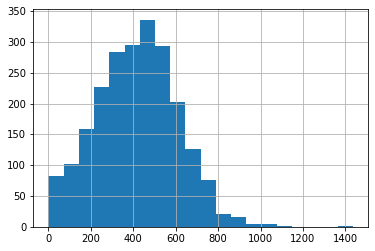

In [90]:
merged_total_smart.duration_rounded_up.hist(bins=20)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

Пользователи тарифа smart в месяц используют от 0 до 1435 минут, наиболее часто от 440 до 500 минут. Средний пользователь этого тарифа в средний месяц говорит по телефону 417.7 минут, меньше, чем по 14 минут в день и меньше, чем включенные в тариф ежемесячно 500 минут разговора. 

_Посмотрим среднюю продолжительность звонков по месяцам_

In [91]:
merged_total_smart_month_pivot=merged_total_smart.pivot_table(
    index=['month'], 
    values='duration_rounded_up', 
    aggfunc='mean').reset_index()
merged_total_smart_month_pivot

,month,duration_rounded_up
0,1,203.85
1,2,298.69
2,3,390.05
3,4,367.13
4,5,387.36
5,6,395.64
6,7,408.35
7,8,421.47
8,9,428.61
9,10,426.14


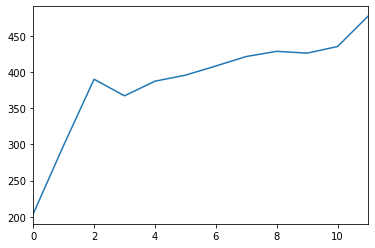

In [92]:
merged_total_smart_month_pivot.duration_rounded_up.plot()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

Видим, что средняя продолжительность разговора растет по месяцам от начала года к концу, но и концу не достигает 500 минут. 

_Как ведет себя пользователь в среднем за год?_

In [93]:
merged_total_smart_pivot2=merged_total_smart.pivot_table(index=['user_id'], values='duration_rounded_up', aggfunc='mean').reset_index()
merged_total_smart_pivot2

,user_id,duration_rounded_up
0,1001,422.00
1,1002,216.71
2,1005,550.42
3,1006,318.27
4,1007,486.56
...,...,...
346,1494,389.20
347,1496,498.67
348,1497,468.67
349,1498,323.25


In [94]:
merged_total_smart_pivot2.duration_rounded_up.describe()

count   351.00
mean    418.44
std     146.55
min       0.00
25%     315.96
50%     424.88
75%     518.62
max     891.50
Name: duration_rounded_up, dtype: float64

Средний пользователь в течение года говорил от 0 до 891.50 минут в месяц, среднее в этом случае составляет 418 мин. в месяц, что также не достигает 500 минут. 

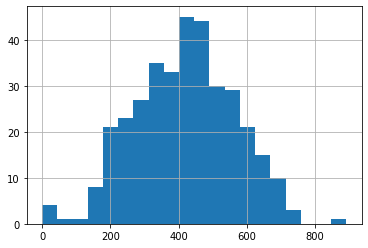

In [95]:
merged_total_smart_pivot2.duration_rounded_up.hist(bins=20)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7))`
    
</div>

Все распределения, которые мы увидели для пользователей данного тарифа в отношении звонков, выглядят как нормальные. 

In [96]:
merged_total_smart.query('duration_rounded_up > 500')['user_id'].nunique()

213

Только 213 пользователей из 351 превысили порог включенного в тариф лимита по минутам хотя бы раз в течение года.

##### Тариф ultra

In [97]:
merged_total_ultra.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


In [98]:
merged_total_ultra.duration_rounded_up.describe()

count    986.00
mean     526.09
std      317.89
min        0.00
25%      282.50
50%      518.00
75%      751.75
max     1673.00
Name: duration_rounded_up, dtype: float64

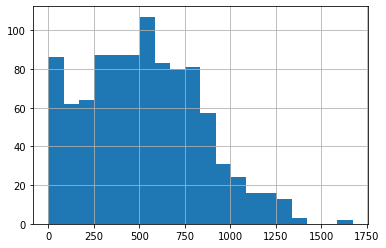

In [99]:
merged_total_ultra.duration_rounded_up.hist(bins=20)

Пользователи тарифа ultra в месяц используют от 0 до 1673 минут, наиболее вероятно от 500 до 550 минут. Средний пользователь этого тарифа в средний месяц говорит по телефону 526 минут, меньше, чем по 18 минут в день и меньше, чем включенные в тариф ежемесячно 3000 минут разговора. Никто из пользователей не проговорил более 3000 минут и не вышел из лимита своего тарифа. 

_Посмотрим среднюю продолжительность звонков по месяцам_

In [100]:
merged_total_ultra_month_pivot=merged_total_ultra.pivot_table(
    index=['month'], 
    values='duration_rounded_up', 
    aggfunc='mean').reset_index()
merged_total_ultra_month_pivot

,month,duration_rounded_up
0,1,428.11
1,2,297.12
2,3,489.65
3,4,458.02
4,5,510.33
5,6,479.70
6,7,545.79
7,8,510.78
8,9,539.44
9,10,558.08


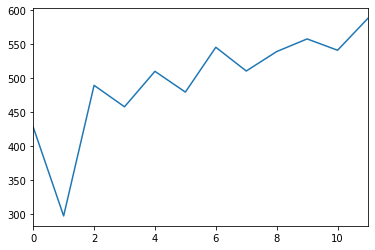

In [101]:
merged_total_ultra_month_pivot.duration_rounded_up.plot()

Видим, что средняя продолжительность звонков также растет, но неравномерно от месяца к месяцу. 

_Как ведет себя пользователь в среднем за год?_

In [102]:
merged_total_ultra_pivot2=merged_total_ultra.pivot_table(index=['user_id'], values='duration_rounded_up', aggfunc='mean').reset_index()
merged_total_ultra_pivot2

,user_id,duration_rounded_up
0,1000,320.75
1,1003,764.40
2,1004,123.38
3,1013,468.00
4,1016,61.00
...,...,...
144,1476,467.11
145,1485,584.00
146,1491,513.33
147,1493,372.00


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши графики повторяются.
    
Это говорит о том, что мы можем создать функцию для оптимизации нашего кода. 
    
</div>

In [103]:
merged_total_ultra_pivot2.duration_rounded_up.describe()

count    149.00
mean     524.28
std      284.14
min        0.00
25%      320.75
50%      513.33
75%      746.33
max     1179.36
Name: duration_rounded_up, dtype: float64

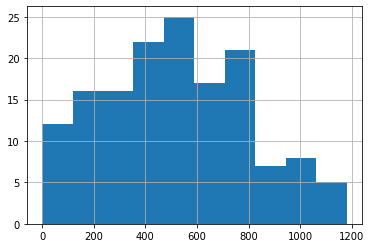

In [104]:
merged_total_ultra_pivot2.duration_rounded_up.hist()

Средний пользователь говорит в месяц от 0 до 1179 минут, не добираясь до лимита его тарифа. 

Все распределения также выглядят как нормальные. 

In [105]:
merged_total_ultra.query('duration_rounded_up > 3000')['user_id'].nunique()

0

Как уже говорилось ранее, никто из пользователей ultra в течение года ни разу не превысил лимит по минутам, включенный в его тариф. 

Используем ту же схему анализа данных для анализа смс и интернет-трафика. 

#### Данные об смс-сообщениях

##### Тариф smart

In [106]:
merged_total_smart.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
10,1002,6,Стерлитамак,smart,550,117.00,0.00,4.00,0.00,10856.82,1000,1550.00
11,1002,7,Стерлитамак,smart,550,214.00,0.00,11.00,0.00,17580.10,0,550.00
12,1002,8,Стерлитамак,smart,550,289.00,0.00,13.00,0.00,20319.26,0,550.00


In [107]:
merged_total_smart.messages_qty.describe()

count   2230.00
mean      33.37
std       28.23
min        0.00
25%       10.00
50%       28.00
75%       51.00
max      143.00
Name: messages_qty, dtype: float64

Пользователи отправляют от 1 до 143 смс в месяц, в среднем 33,37 шт., 

In [108]:
merged_total_smart.query('messages_qty > 50')['user_id'].nunique()

125

И только 125 из 391 пользователей тарифа хотя бы раз в течение года отправили за месяц больше смс, чем включено в их тариф. Судя по результатам построения гистаграммы ниже, наиболее часто пользователь отправляет до 10 смс в месяц

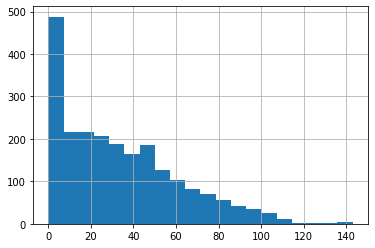

In [109]:
merged_total_smart.messages_qty.hist(bins=20)

_Сколько сообщений отправляют пользователи в среднем по месяцам?_

In [110]:
merged_total_smart_sms_pivot=merged_total_smart.pivot_table(index=['month'], values='messages_qty', aggfunc='mean').reset_index()
merged_total_smart_sms_pivot

,month,messages_qty
0,1,18.24
1,2,24.09
2,3,31.86
3,4,30.74
4,5,33.77
5,6,33.40
6,7,33.75
7,8,33.64
8,9,33.64
9,10,33.77


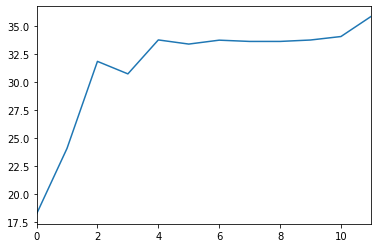

In [111]:
merged_total_smart_sms_pivot.messages_qty.plot()

Количество отправленных смс в месяц растет, но так и не достигает включенного в тариф лимита в размере 50 смс. 

_Среднее по пользователям в течение года_

In [112]:
merged_total_smart_sms_pivot_user=merged_total_smart.pivot_table(index=['user_id'], values='messages_qty', aggfunc='mean').reset_index()
merged_total_smart_sms_pivot_user

,user_id,messages_qty
0,1001,0.00
1,1002,10.00
2,1005,46.00
3,1006,0.00
4,1007,25.00
...,...,...
346,1494,0.00
347,1496,39.00
348,1497,17.00
349,1498,42.00


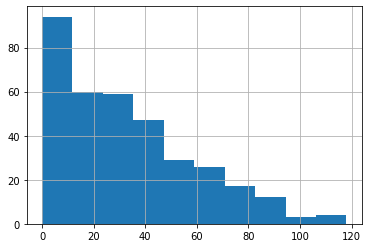

In [113]:
merged_total_smart_sms_pivot_user.messages_qty.hist()

Распределение выглядит как нормальное и тяготеет к 10 смс в месяц.

##### Тариф ultra

In [114]:
merged_total_ultra.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


In [115]:
merged_total_ultra.messages_qty.describe()

count   986.00
mean     49.31
std      47.81
min       0.00
25%       6.00
50%      38.00
75%      78.75
max     224.00
Name: messages_qty, dtype: float64

In [116]:
merged_total_ultra.query('messages_qty > 1000')['user_id'].nunique()

0

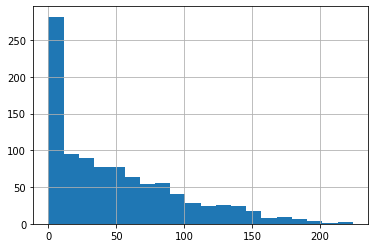

In [117]:
merged_total_ultra.messages_qty.hist(bins=20)

Пользователи отправляли от 1 до 224 смс в течение этого года, никто из них не отправил более 1000 сообщений, включенных в тариф. Среднее - 49,3 смс, наиболее часто пользователи отправляли также до 10 смс в месяц.

In [118]:
merged_total_ultra_sms_pivot=merged_total_ultra.pivot_table(index=['month'], values='messages_qty', aggfunc='mean').reset_index()
merged_total_ultra_sms_pivot

,month,messages_qty
0,1,33.78
1,2,21.96
2,3,32.30
3,4,31.56
4,5,37.85
5,6,41.73
6,7,49.85
7,8,48.44
8,9,52.29
9,10,58.43


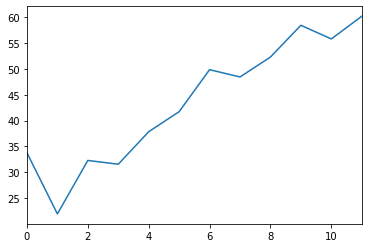

In [119]:
merged_total_ultra_sms_pivot.messages_qty.plot()

Среднее количество отправляемых в месяц смс также растет от начала года к концу. 

In [120]:
merged_total_ultra_sms_pivot_user=merged_total_ultra.pivot_table(index=['user_id'], values='messages_qty', aggfunc='mean').reset_index()
merged_total_ultra_sms_pivot_user

,user_id,messages_qty
0,1000,62.00
1,1003,76.00
2,1004,149.00
3,1013,21.00
4,1016,71.00
...,...,...
144,1476,5.00
145,1485,155.00
146,1491,48.00
147,1493,47.00


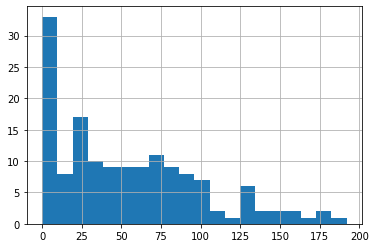

In [121]:
merged_total_ultra_sms_pivot_user.messages_qty.hist(bins=20)

Наиболее часто пользователь отправлял менее 10 смс в месяц. 

#### Данные об интернет-трафике

##### Тариф smart

In [122]:
merged_total_smart.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
10,1002,6,Стерлитамак,smart,550,117.00,0.00,4.00,0.00,10856.82,1000,1550.00
11,1002,7,Стерлитамак,smart,550,214.00,0.00,11.00,0.00,17580.10,0,550.00
12,1002,8,Стерлитамак,smart,550,289.00,0.00,13.00,0.00,20319.26,0,550.00


In [123]:
merged_total_smart.mb_used_sum.describe()

count    2230.00
mean    16201.12
std      5879.19
min         0.00
25%     12630.03
50%     16505.47
75%     20042.11
max     38552.45
Name: mb_used_sum, dtype: float64

In [124]:
merged_total_smart.query('mb_used_sum > 15000')['user_id'].nunique()

314

314 пользователей из 359 хотя бы раз в течение года превысили свой включенный в тариф трафик. 

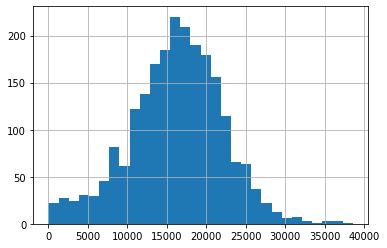

In [125]:
merged_total_smart.mb_used_sum.hist(bins=30)

Пользователи этого тарифа используют от 0 до 38,5 Гб в месяц интернет-трафика. 270 пользователей из 351 хотя бы раз в месяц в течение года превысили лимит, включенный в тариф. Большинство из них используют около 16 Гб в месяц в среднем

In [126]:
merged_total_smart_internet_pivot=merged_total_smart.pivot_table(index=['month'], values='mb_used_sum', aggfunc='mean').reset_index()
merged_total_smart_internet_pivot

,month,mb_used_sum
0,1,8513.72
1,2,11597.05
2,3,15104.16
3,4,13462.18
4,5,15805.18
5,6,15794.65
6,7,15743.15
7,8,16610.72
8,9,16303.58
9,10,16757.12


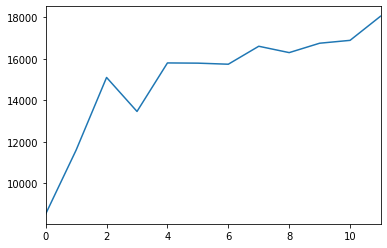

In [127]:
merged_total_smart_internet_pivot.mb_used_sum.plot()

Используемый трафик также растет от начала года к концу

_Средний ежемесячный трафик по пользователям (за год)_

In [128]:
merged_total_smart_internet_pivot2=merged_total_smart.pivot_table(index=['user_id'], values='mb_used_sum', aggfunc='mean').reset_index()
merged_total_smart_internet_pivot2

,user_id,mb_used_sum
0,1001,16233.00
1,1002,16576.65
2,1005,8307.28
3,1006,14926.26
4,1007,14625.07
...,...,...
346,1494,15398.83
347,1496,22578.52
348,1497,15191.66
349,1498,18606.31


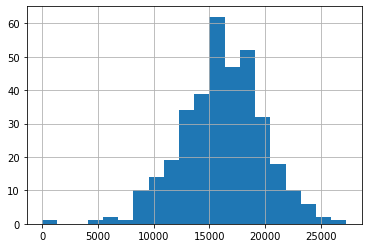

In [129]:
merged_total_smart_internet_pivot2.mb_used_sum.hist(bins=20)

Чаще всего пользователи используют чуть более 15 Гб

##### Тариф ultra

In [130]:
merged_total_ultra.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


In [131]:
merged_total_ultra.mb_used_sum.describe()

count     986.00
mean    19449.06
std     10101.10
min         0.00
25%     11748.59
50%     19304.02
75%     26835.89
max     49745.69
Name: mb_used_sum, dtype: float64

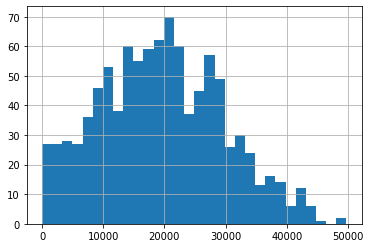

In [132]:
merged_total_ultra.mb_used_sum.hist(bins=30)

In [133]:
merged_total_ultra.query('mb_used_sum > 30000')['user_id'].nunique()

46

Пользователи используют от 0 до 49.7 Гб трафика в месяц, 46 пользователей из 149 хотя бы один раз в течение года превысили лимит в 30 Гб, включенных в тариф. Наиболее часто пользователь тратит около 19 Гб в месяц.

In [134]:
merged_total_ultra_internet_pivot=merged_total_ultra.pivot_table(index=['month'], values='mb_used_sum', aggfunc='mean').reset_index()
merged_total_ultra_internet_pivot

,month,mb_used_sum
0,1,13140.68
1,2,11775.94
2,3,17535.55
3,4,16828.13
4,5,19363.15
5,6,18924.94
6,7,20495.67
7,8,19576.05
8,9,19204.28
9,10,20045.34


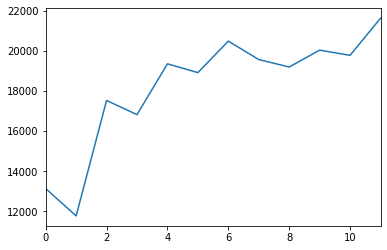

In [135]:
merged_total_ultra_internet_pivot.mb_used_sum.plot()

Средний ежемесячный трафик пользователей этого тарифа также растет от начала года к концу. 

In [136]:
merged_total_ultra_internet_pivot2=merged_total_ultra.pivot_table(index=['user_id'], values='mb_used_sum', aggfunc='mean').reset_index()
merged_total_ultra_internet_pivot2

,user_id,mb_used_sum
0,1000,13424.04
1,1003,11456.13
2,1004,18629.94
3,1013,15258.58
4,1016,13405.22
...,...,...
144,1476,16698.43
145,1485,23422.76
146,1491,17940.25
147,1493,27209.69


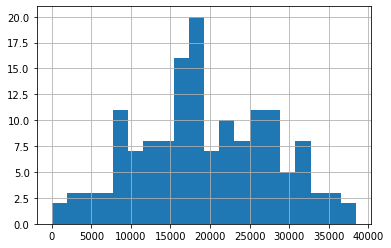

In [137]:
merged_total_ultra_internet_pivot2.mb_used_sum.hist(bins=20)

Большинство пользователей также тратит менее включенных в тариф 30 Гб

_Растет ли среднее количество пользователей тарифов, а не только средние показатели их минут, смс и трафика?_

In [138]:
merged_total_smart

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
10,1002,6,Стерлитамак,smart,550,117.00,0.00,4.00,0.00,10856.82,1000,1550.00
11,1002,7,Стерлитамак,smart,550,214.00,0.00,11.00,0.00,17580.10,0,550.00
12,1002,8,Стерлитамак,smart,550,289.00,0.00,13.00,0.00,20319.26,0,550.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,Владикавказ,smart,550,247.00,0.00,42.00,0.00,20579.36,0,550.00
3212,1499,9,Пермь,smart,550,70.00,0.00,11.00,0.00,1845.75,2800,3350.00
3213,1499,10,Пермь,smart,550,449.00,0.00,48.00,0.00,17788.51,0,550.00
3214,1499,11,Пермь,smart,550,612.00,336.00,59.00,27.00,17963.31,0,913.00


In [139]:
merged_total_smart.pivot_table(index=['month'], values='bill_per_month', aggfunc='count').reset_index()

,month,bill_per_month
0,1,34
1,2,58
2,3,77
3,4,112
4,5,141
5,6,164
6,7,201
7,8,235
8,9,260
9,10,294


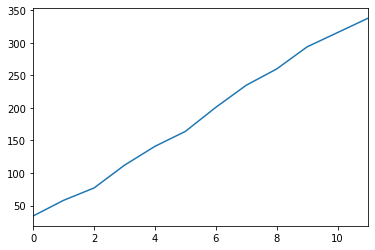

In [140]:
merged_total_smart.pivot_table(index=['month'], values='bill_per_month', aggfunc='count').reset_index()['bill_per_month'].plot()

In [141]:
merged_total_ultra.pivot_table(index=['month'], values='bill_per_month', aggfunc='count').reset_index()

,month,bill_per_month
0,1,9
1,2,24
2,3,37
3,4,55
4,5,67
5,6,84
6,7,91
7,8,107
8,9,115
9,10,123


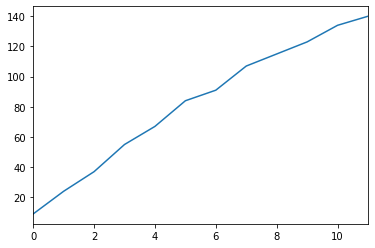

In [142]:
merged_total_ultra.pivot_table(index=['month'], values='bill_per_month', aggfunc='count').reset_index()['bill_per_month'].plot()

Среднее количество пользователей каждого тарифа от начала года к концу года растет. 

##### Как меняется средний чек пользователей в зависимости от тарифа по месяцам? 

_Тариф smart_

In [143]:
merged_total_smart.bill_per_month.describe()

count   2230.00
mean    1116.55
std      705.63
min      550.00
25%      550.00
50%      839.50
75%     1385.50
max     3750.00
Name: bill_per_month, dtype: float64

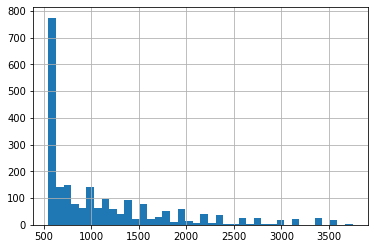

In [144]:
merged_total_smart.bill_per_month.hist(bins=40)

Чек от 550 до 3750 р., наиболее часто - около 550 р ., в среднем 1116,5 р. 

_Изменение среднего чека по месяцам_

In [145]:
merged_total_smart_bill_pivot=merged_total_smart.pivot_table(
    index=['month'], 
    values='bill_per_month', 
    aggfunc='mean').reset_index()
merged_total_smart_bill_pivot

,month,bill_per_month
0,1,2162.50
1,2,1627.60
2,3,1226.96
3,4,1372.02
4,5,1113.82
5,6,1114.99
6,7,1148.33
7,8,1055.91
8,9,1063.79
9,10,1073.70


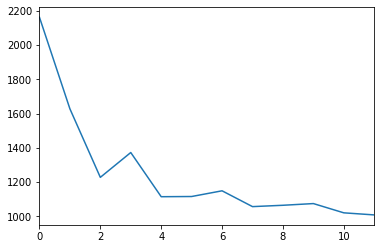

In [146]:
merged_total_smart_bill_pivot.bill_per_month.plot()

"Средний чек" пользователя тарифа smart падает от начала года к концу, в два раза. 

In [147]:
merged_total_smart.query('bill_per_month > 1950')['user_id'].nunique()

180

У 180 пользователей из 351 в тарифе smart чек за месяц в течение года хотя бы один раз превысил 1950 р. (цену тарифа ultra). 

_Тариф ultra_

In [148]:
merged_total_ultra.bill_per_month.describe()

count    986.00
mean    3820.74
std     1340.74
min     1950.00
25%     2550.00
50%     3750.00
75%     4800.00
max     6600.00
Name: bill_per_month, dtype: float64

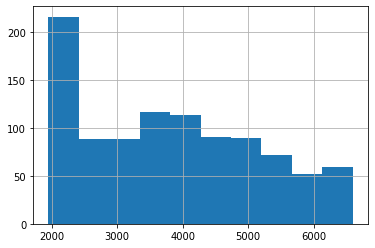

In [149]:
merged_total_ultra.bill_per_month.hist()

Ежемесячно пользователи этого тарифа платили от 1950 до 6600 р. в месяц, в среднем 3820 р., наиболее часто - до 2800 р. в месяц

In [150]:
merged_total_ultra_bill_pivot=merged_total_ultra.pivot_table(
    index=['month'], 
    values='bill_per_month', 
    aggfunc='mean').reset_index()
merged_total_ultra_bill_pivot

,month,bill_per_month
0,1,4683.33
1,2,4875.00
2,3,4045.95
3,4,4153.64
4,5,3830.60
5,6,3869.64
6,7,3707.14
7,8,3811.68
8,9,3811.30
9,10,3732.93


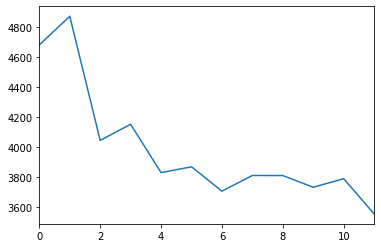

In [151]:
merged_total_ultra_bill_pivot.bill_per_month.plot()

In [152]:
merged_total_ultra.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


Средний чек пользователей этого тарифа также в течение года падает. 

In [153]:
merged_ultra3=merged_total_ultra.pivot_table(index=['user_id'], values=['duration_rounded_up', 'messages_qty', 'mb_used_sum'], aggfunc='mean').reset_index()
merged_ultra3

,user_id,duration_rounded_up,mb_used_sum,messages_qty
0,1000,320.75,13424.04,62.00
1,1003,764.40,11456.13,76.00
2,1004,123.38,18629.94,149.00
3,1013,468.00,15258.58,21.00
4,1016,61.00,13405.22,71.00
...,...,...,...,...
144,1476,467.11,16698.43,5.00
145,1485,584.00,23422.76,155.00
146,1491,513.33,17940.25,48.00
147,1493,372.00,27209.69,47.00


In [154]:
merged_ultra3.query(('duration_rounded_up_sum < 500') and ('messages_per_month < 50') and ('mb_used_sum < 15000'))['user_id'].nunique()

41

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Если мы используем множественную фильтрацию, то рекомендую применять метод `loc`. Он читается проще и работает быстрее.   
</div>

При этом 41 пользователь тарифа ultra из 149 в нашей выборке в среднем в месяц по данным этого года не потратил ни по какому параметру даже того лимита, что содержится в тарифе smart и зря платит почти в четыре раза больше, чем нужно.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Не увидел к сожалению расчета дисперсии для каждого из показателя, давай также посчитаем его.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исходя из поставленной задачи мы описали поведение клиентов оператора, базируясь на выборке, определили, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, а также средние этих показателей. Теперь подсчитаем дисперсию и стандартное отклонение. </div>

Поскольку у нас выборка, то мы используем формулу для оценки дисперсии генеральной совокупности по выборке. Напишем функцию и применим ее далее ко всем нужным столбцам. 

In [155]:
def function_disp (x): 
    variance_estimate = np.var(x, ddof=1)
    standard_deviation = np.std(x)
    print ('Дисперсия равна: {:.2f}'.format(variance_estimate))
    print ('Стандартное отклонение равно: {:.2f}'.format(standard_deviation))

    if (x.max()-x.mean()) < (3*standard_deviation):
        print ('Разница между максимальным значением и средним не превышает 3 стандартных отклонений')
    else: 
        print ('Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.')
    
    if (x.mean()-x.min()) < (3*standard_deviation): 
        print ('Разница между минимальным значением и средним не превышает 3 стандартных отклонений')
    else: 
        print ('Разница между минимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в меньшую сторону.')
    

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличная функция для расчета 👍 
    
</div>

__Тариф smart__

In [156]:
merged_total_smart.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
10,1002,6,Стерлитамак,smart,550,117.00,0.00,4.00,0.00,10856.82,1000,1550.00
11,1002,7,Стерлитамак,smart,550,214.00,0.00,11.00,0.00,17580.10,0,550.00
12,1002,8,Стерлитамак,smart,550,289.00,0.00,13.00,0.00,20319.26,0,550.00


_Использованные минуты разговоров_

In [157]:
function_disp(merged_total_smart.duration_rounded_up)

Дисперсия равна: 36281.39
Стандартное отклонение равно: 190.43
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


_Смс_

In [158]:
function_disp(merged_total_smart.messages_qty)

Дисперсия равна: 796.96
Стандартное отклонение равно: 28.22
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


_Интернет-трафик_

In [159]:
function_disp(merged_total_smart.mb_used_sum)

Дисперсия равна: 34564843.48
Стандартное отклонение равно: 5877.87
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


_Средний чек_

In [160]:
function_disp(merged_total_smart.bill_per_month)

Дисперсия равна: 497914.10
Стандартное отклонение равно: 705.47
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


__Тариф ultra__

In [161]:
merged_total_ultra.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


_Звонки_

In [162]:
function_disp(merged_total_ultra.duration_rounded_up)

Дисперсия равна: 101052.49
Стандартное отклонение равно: 317.73
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


_Смс_

In [163]:
function_disp(merged_total_ultra.messages_qty)

Дисперсия равна: 2285.42
Стандартное отклонение равно: 47.78
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


_Интернет-трафик_

In [164]:
function_disp(merged_total_ultra.mb_used_sum)

Дисперсия равна: 102032129.46
Стандартное отклонение равно: 10095.97
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


_Средний чек_

In [165]:
function_disp(merged_total_ultra.bill_per_month)

Дисперсия равна: 1797571.94
Стандартное отклонение равно: 1340.06
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


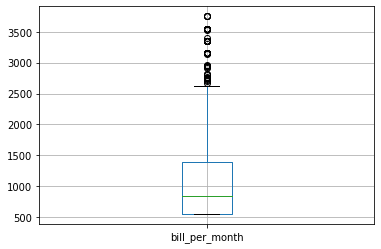

In [166]:
merged_total_smart.boxplot(column='bill_per_month')

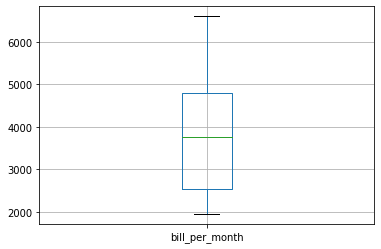

In [167]:
merged_total_ultra.boxplot(column='bill_per_month')

_Выводы по полученным данным о дисперсии и стандартном отклонении:_ 

В среднем чеке в тарифе смарт есть выбросы в бОльшую сторону, хотя по сравнению с тарифом ультра эти выбросы едва достигают его среднего. Возможно, этим клиентам стоит продать тариф ультра, аргументируя это тем, что они переплачивают вне своего тарифа. Для нас это означает, что эти пользователи, став пользователями тарифа ультра, будут приносить больше, т.к., как мы увидим ниже при проверке гипотез, тариф ультра нам, как оператору, выгоднее. 

# 4. Проверка гипотез

#### Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Проверим гипотезу о том, что средняя выручка, полученная от пользователей тарифа smart отличается от тарифа ultra. Сформулируем нулевую гипотезу как "средняя выручка, полученная от пользователей smart равняется средней выручке ultra". Альтернативная гипотеза: "не равна". Будем считать, что та выборка из 500 пользователей, которая у нас есть, отражает пропорции распределения тарифов по количеству пользователей. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    
Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

Средний чек smart:

In [168]:
merged_total_smart.bill_per_month.mean()

1116.547533632287

Средний чек ultra:

In [169]:
merged_total_ultra.bill_per_month.mean()

3820.740365111562

In [170]:
alpha = 0.05
results_tariff = st.ttest_ind (merged_total_smart.bill_per_month, merged_total_ultra.bill_per_month, equal_var=True)
print('p-значение:', results_tariff.pvalue)
if results_tariff.pvalue < alpha:
    print('Мы отвергаем гипотезу "средняя выручка, полученная от пользователей smart равняется средней выручке ultra"')
else:
    print('У нас не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0
Мы отвергаем гипотезу "средняя выручка, полученная от пользователей smart равняется средней выручке ultra"


Раз мы отвергли эту гипотезу, проверим гипотезу о том, что (как видно из двух расчетов средних выше) средняя выручка пользователя ultra превышает среднюю выручку пользователя smart

Нулевая гипотеза: среднее smart равно среднему ultra, альтернативная гипотеза:  среднее smart меньше среднего ultra

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
        
</div>

In [171]:
ultra_bill =  merged_total_ultra.bill_per_month
smart_bill_mean = merged_total_smart.bill_per_month.mean()
alpha = 0.05 
results_compare = st.ttest_1samp(ultra_bill, smart_bill_mean)

print('p-значение: ', results_compare.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только если выборочное среднее значимо меньше предполагаемого значения
if (results_compare.pvalue / 2 < alpha) and (ultra_bill.mean() > smart_bill_mean):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0
Отвергаем нулевую гипотезу


_Принимаем в этом контексте альтернативную гипотезу: среднее smart меньше среднего ultra._

#### Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [172]:
df_general.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


In [173]:
df_general.city.isnull().value_counts()

False    3216
Name: city, dtype: int64

Данные о городе заполнены у всех пользователей. 

Проверим наличие опечаток в названиях городов

In [174]:
df_general.city.unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Опечаток нет. 


Отделим Москву от регионов. 

_Пользователи в Москве_

In [175]:
merged_total_moscow=df_general.query('city == "Москва"')
merged_total_moscow.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
8,1001,11,Москва,smart,550,430.00,0.00,0.00,0.00,18429.34,0,550.00
9,1001,12,Москва,smart,550,414.00,0.00,0.00,0.00,14036.66,400,950.00
17,1003,8,Москва,ultra,1950,380.00,0.00,37.00,0.00,8565.21,3450,5400.00
18,1003,9,Москва,ultra,1950,961.00,0.00,91.00,0.00,12468.87,2850,4800.00
19,1003,10,Москва,ultra,1950,855.00,0.00,83.00,0.00,14768.14,2400,4350.00


In [176]:
print ('Количество пользователей в Москве:', (merged_total_moscow.user_id.nunique()))

Количество пользователей в Москве: 99


In [177]:
merged_total_moscow.duration_rounded_up.describe()

count    611.00
mean     469.15
std      241.54
min        0.00
25%      304.00
50%      453.00
75%      620.50
max     1321.00
Name: duration_rounded_up, dtype: float64

In [178]:
merged_total_moscow.messages_qty.describe()

count   611.00
mean     37.88
std      37.16
min       0.00
25%       6.50
50%      29.00
75%      57.00
max     191.00
Name: messages_qty, dtype: float64

In [179]:
merged_total_moscow.mb_used_sum.describe()

count     611.00
mean    17963.87
std      7844.97
min       365.09
25%     12612.29
50%     17537.95
75%     22114.81
max     44296.86
Name: mb_used_sum, dtype: float64

In [180]:
merged_total_moscow.bill_per_month.describe()

count    611.00
mean    2001.05
std     1524.62
min      550.00
25%      677.50
50%     1554.00
75%     2850.00
max     6600.00
Name: bill_per_month, dtype: float64

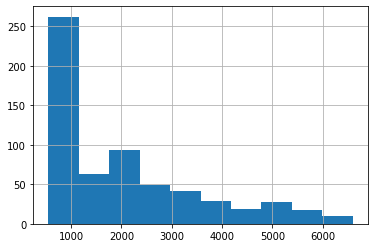

In [181]:
merged_total_moscow.bill_per_month.hist(bins=10)

Пользователи в Москве потратили на услуги связи от 550 до 6300 р. в среднем ежемесячно в течение этого года, в среднем 2001 р., в среднем в месяц истратив 469 минуты, 37 смс, 19 Гб интернета. 

In [182]:
merged_total_moscow_pivot=merged_total_moscow.pivot_table(index='month', values='bill_per_month', aggfunc='mean').reset_index()
merged_total_moscow_pivot

,month,bill_per_month
0,1,2600.00
1,2,2171.57
2,3,2179.60
3,4,2336.07
4,5,2039.49
5,6,2176.26
6,7,2037.86
7,8,1903.94
8,9,2038.99
9,10,1939.77


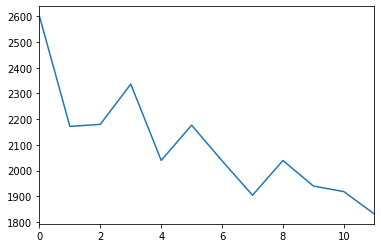

In [183]:
merged_total_moscow_pivot.bill_per_month.plot()

Средний чек пользователей в Москве падает, а количество пользователей растет. 

_Пользователи в регионах_

In [184]:
merged_total_region=df_general.query('city != "Москва"')
merged_total_region.head()

,user_id,month,city,tariff,rub_monthly_fee,duration_rounded_up,pay_for_call_extra,messages_qty,pmnt_for_extra_messages,mb_used_sum,pmnt_for_internet,bill_per_month
0,1000,5,Краснодар,ultra,1950,159.00,0.00,22.00,0.00,2253.49,4350,6300.00
1,1000,6,Краснодар,ultra,1950,172.00,0.00,60.00,0.00,23233.77,1200,3150.00
2,1000,7,Краснодар,ultra,1950,340.00,0.00,75.00,0.00,14003.64,2550,4500.00
3,1000,8,Краснодар,ultra,1950,408.00,0.00,81.00,0.00,14055.93,2550,4500.00
4,1000,9,Краснодар,ultra,1950,466.00,0.00,57.00,0.00,14568.91,2550,4500.00


In [185]:
merged_total_region.user_id.nunique()

401

401 пользователь из регионов

In [186]:
merged_total_region.duration_rounded_up.describe()

count   2605.00
mean     446.70
std      242.08
min        0.00
25%      280.00
50%      440.00
75%      584.00
max     1673.00
Name: duration_rounded_up, dtype: float64

In [187]:
merged_total_region.messages_qty.describe()

count   2605.00
mean      38.35
std       35.92
min        0.00
25%        9.00
50%       30.00
75%       57.00
max      224.00
Name: messages_qty, dtype: float64

In [188]:
merged_total_region.mb_used_sum.describe()

count    2605.00
mean    17017.02
std      7507.65
min         0.00
25%     12450.19
50%     16848.90
75%     21231.85
max     49745.69
Name: mb_used_sum, dtype: float64

In [189]:
merged_total_region.bill_per_month.describe()

count   2605.00
mean    1932.63
std     1575.04
min      550.00
25%      637.00
50%     1294.00
75%     2750.00
max     6600.00
Name: bill_per_month, dtype: float64

В регионах тратили на оплату мобильной связи от 550 до 6600 руб. ежемесячно, в среднем 1932,63 р. в месяц, и использовали в среднем 469 минут, 37 смс и 17 Гб интернета.

In [190]:
merged_total_region_pivot=merged_total_region.pivot_table(index='month', values='bill_per_month', aggfunc='mean').reset_index()
merged_total_region_pivot

,month,bill_per_month
0,1,2710.71
1,2,2661.75
2,3,2133.87
3,4,2278.04
4,5,1977.27
5,6,2018.03
6,7,1923.92
7,8,1921.24
8,9,1876.99
9,10,1838.38


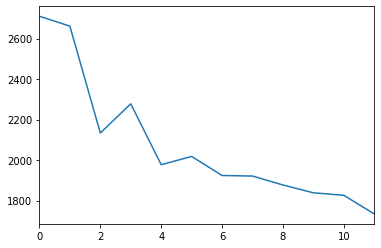

In [191]:
merged_total_region_pivot.bill_per_month.plot()

Средний чек пользователей в регионах также падает от начала года к концу. 

Теперь проверим гипотезу о том, что средняя выручка, полученная от пользователей из Москвы отличается о региональных. Сформулируем нулевую гипотезу как "средняя выручка, полученная от пользователей из Москвы равняется средней выручки, полученной от пользователей в регионах". Альтернативная гипотеза: "не равна". Будем считать, что та выборка из 500 пользователей, которая у нас есть, отражает пропорции распределения тарифов по количеству пользователей и по количеству пользователей из Москвы и регионов. По среднему, рассчитанному из наших выборок, будем судить о среднем генеральных совокупностей пользователей оператора в столице и регионах. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
    
</div>

In [192]:
from scipy import stats as st

In [193]:
merged_total_moscow.bill_per_month.mean()

2001.050736497545

In [194]:
merged_total_region.bill_per_month.mean()

1932.6330134357006

In [195]:
alpha = 0.05
results = st.ttest_ind (merged_total_moscow.bill_per_month, merged_total_region.bill_per_month, equal_var=True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Мы отвергаем гипотезу "средняя выручка, полученная от пользователей из Москвы равняется средней выручке, полученной от пользователей в регионах"')
else:
    print('У нас не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.3310245929943547
У нас не получилось отвергнуть нулевую гипотезу


Проверим еще одну гипотезу. Нулевая гипотеза: среднее регионов равно среднему Москвы, альтернативная гипотеза:  среднее регионов меньше среднего Москвы. 

In [196]:
merged_total_moscow.bill_per_month.mean()

2001.050736497545

In [197]:
merged_total_region.bill_per_month.mean()

1932.6330134357006

In [198]:
moscow_bill =  merged_total_moscow.bill_per_month
region_bill_mean = merged_total_region.bill_per_month.mean()


alpha = .05 
results_compare_2 = st.ttest_1samp(moscow_bill, region_bill_mean)

print('p-значение: ', results_compare_2.pvalue / 2)

if (results_compare_2.pvalue / 2 < alpha) and (moscow_bill.mean() > region_bill_mean):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.1338811690436945
Не получилось отвергнуть нулевую гипотезу


Ни в каком случае мы не можем отвергнуть нулевую гипотезу. Вероятность получить различное среднее случайно равно 33%, что очень много. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

# 5. Общий вывод

Мы проанализировали данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год и получили информацию для того, чтобы сделать вывод — какой тариф лучше для нас, как для оператора. Это тариф ultra, т.к. средний чек по нему больше среднего чека пользователей smart, даже с учетом доплат за услуги, которые те и другие пользователи делают сверх включенного в их тарифы лимита. При этом пользователи в регионах с точки зрения среднего чека для нас также интересны, как пользователи из Москвы. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Достаточно детально проделанная работа и это не может не радовать 😊
    
Давай поправим мои комментарии и будем двигаться дальше.
    
Если у тебя вдруг есчть какие–либо вопросы, то я с радостью отвечу на них 😊
       

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Насчет повторения и функций понятно :) Я максимально стараюсь в проектах делать всё руками, потому что в моём случае повтроение - не мать заикания)), а способ понять всё как можно лучше :) я даже pandas profiling не хочу использовать поэтому.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> У меня есть вопрос, как сделать оглавление тетрадки (по перечню и уровням заголовков, которые мы формировали по ходу аналитики)?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Здорово, что достаточно оперативно поправили мои комментарии.
    
Если ты имеешь в виду обычные заголовки, то используется # в ячейках markdown. Если ты про нумерацию, то в юпитезе есть плагины, он называется ToC или table of content, его можно себе поставить локально.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
       
Рекомендую посмотреть в открытом доступе на ютубе например – курс по Алгоритмам и структурам данных, эта информация поможет нам в дальнейшем при работе с данными.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
 
    
</div>